In [1]:
from PIL import Image
from numpy import *
from pylab import *
import scipy.misc

In [2]:
from scipy.cluster.vq import *

In [3]:
from scipy.misc import imresize

In [4]:
import os
import hcluster
hcluster = reload(hcluster)

In [5]:
path = 'goldengatebridge/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]

In [6]:
features = zeros([len(imlist), 512])
for i, f in enumerate(imlist):
    im = array(Image.open(f))

    h, edges = histogramdd(im.reshape(-1, 3), 8, normed=True, range=[(0,255), (0, 255), (0, 255)])

    features[i] = h.flatten()

In [7]:
tree = hcluster.hcluster(features)

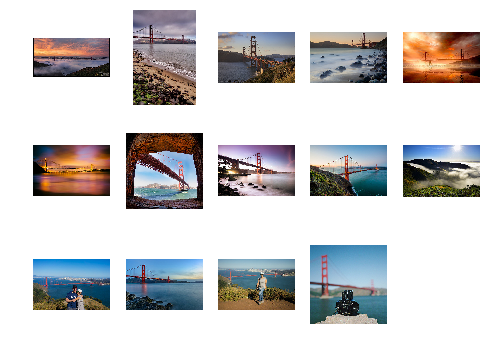

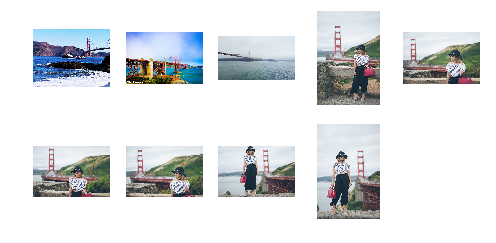

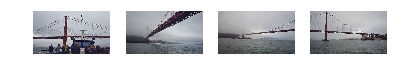

In [14]:
clusters = tree.extract_clusters(0.6*tree.distance)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>3:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 5, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()

In [15]:
hcluster.draw_dendrogram(tree, imlist, filename='goldengate_rgb.pdf')

In [17]:
n = len(features)
S = array([[sqrt(sum((features[i]-features[j])**2)) for i in range(n)] for j in range(n)], 'f')

In [20]:
rowsum = sum(S, axis=0)
D = diag(1/sqrt(rowsum))
I = identity(n)
L = I - dot(D, dot(S, D))
U, sigma, V = linalg.svd(L)

In [21]:
k = 5
f = array(V[:k]).T

In [23]:
f = whiten(f)
centroids, distortion = kmeans(f, k)
code, distance = vq(f, centroids)

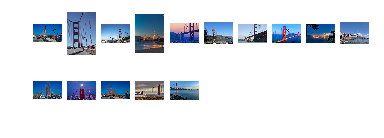

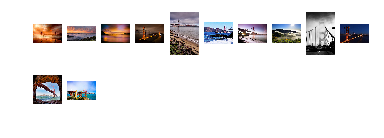

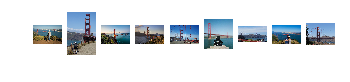

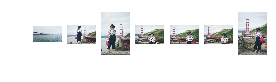

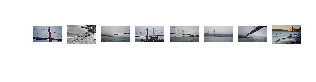

In [24]:
for c in range(k):
    ind = where(code==c)[0]
    figure()
    for i in range(minimum(len(ind), 39)):
        im = Image.open(imlist[ind[i]])
        subplot(4, 10, i+1)
        gray()
        imshow(array(im))
        axis('equal')
        axis('off')
show()